논문 제목 : Rethinking the Inception Architecture for Computer Vision 
논문이 주로 소개하고 싶은 항목 : Inception-v2와 Inception-v3


### 현재의 문제점

모델의 크기 증가 -> 정확도와 연산량이 증가함
여기서 한발짝 -> ResNet은 skip connection을 도입해 모델의 깊이를 증가 -> 성능향상
-> 단점 발생 : 깊이가 깊어진 만큼 연산량이 많이 늘어남

**모델의 크기 증가 -> 연산량 증가 -> 필요 메모리량 증가**

논문의 제안 : Convolution 분해 -> 연산량을 최소화 하면서 모델의 크기를 키우는 방안을 제시

성과 : Inception-v3 모델은 적은 파라미터를 가진 42-layer의 깊은 신경망으로 VGGNet와 비슷한 연산량을 가짐
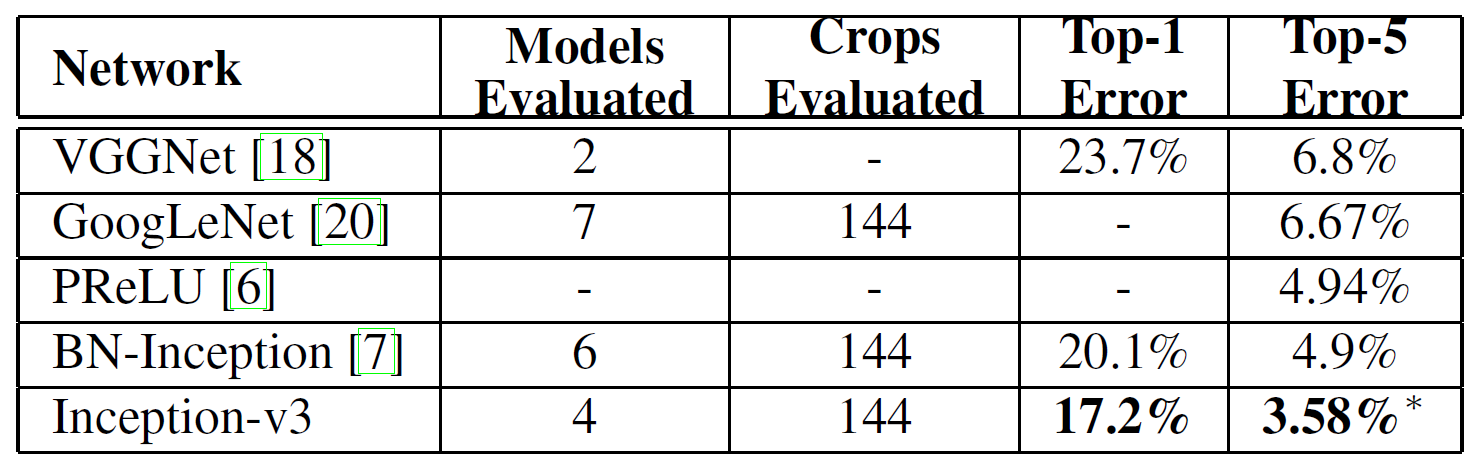

그러면서 동시에 ILSVR 2012데이터셋을 기반으로 한 성능평가에서 VGGNet대비 더 좋은 성능을 보여준다.

여기서 Inception-v3는 논문이 설명하는 Inception-v2를 더 발전시킨 모델이다
(논문은 inception모듈을 1, 2, 3 버전을 다 설명하는듯?) -> GoogLeNet는 Inception의 버전1에 속하는 듯 하다.

### 챕터 3부터 시작

우선 논문이 비교대상으로 선정한 GoogLeNet을 설명함
GoogLeNet : **합성곱 분해하기(Factorizing Convolutions)**기술을 사용했으며, 

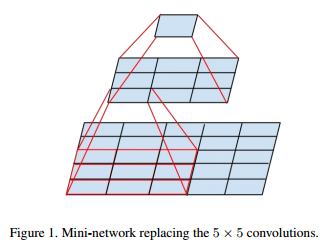

위 사진처럼 5x5 convolution, 7x7 convolution에 해당하는 Feature Map를 차원 축소로 1x1 convolution, 3x3 Convolution을 여러개 활용해서 파라미터 수를 감소함
따라서 이러한 합성곱 문해 -> 연산량 감소 -> 빠른 학습이 가능함

이것은 VGG Net에서도 소개가 된 방법임 -> 여기에 배치 정규화(Batch normalization)까지 적용하면 더 정확도가 높아지게 됨

실제로 GoogLeNet은 아래 그림의 두가지 Inception module를 적용했음
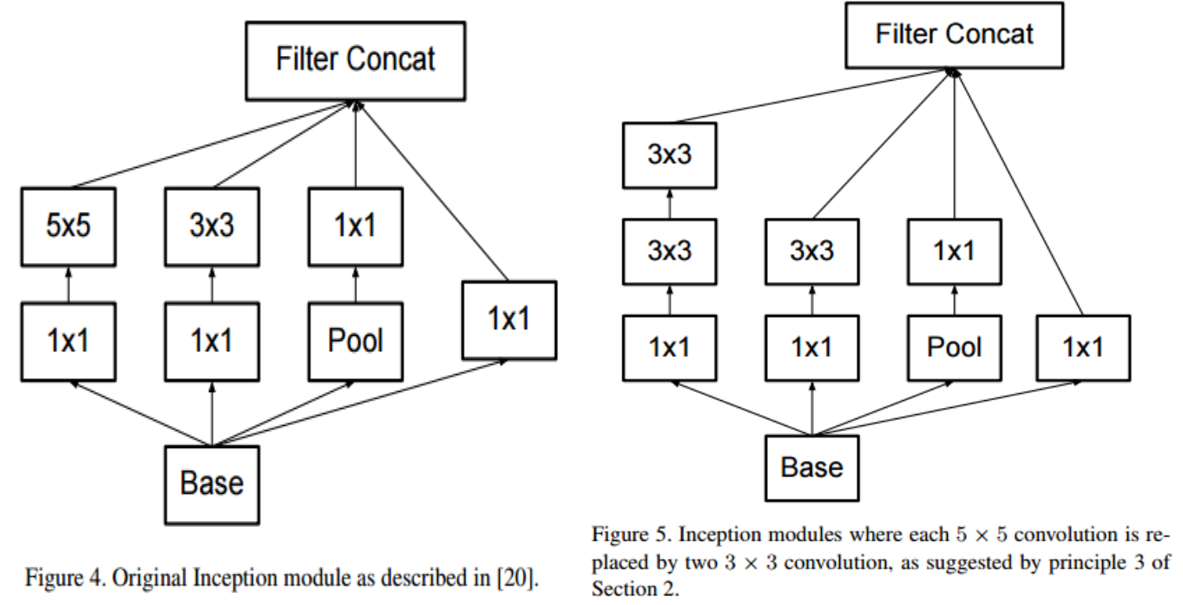
여기서 오른쪽 그림은 5x5의 합성곱을 inclepion을 응용하여 적용한 것으로 두개의 3x3합성곱으로 대체한 inception모듈이다. 


여기서 논문의 저자는 1절 더 하기로 함 -> 이게 Spatial Factorization into Asymmetric Convolutions(비대칭 합성곱의로의 공간적 분해) : **비대칭 합성곱(Asymmetric Convolutions) 분해** 이다.

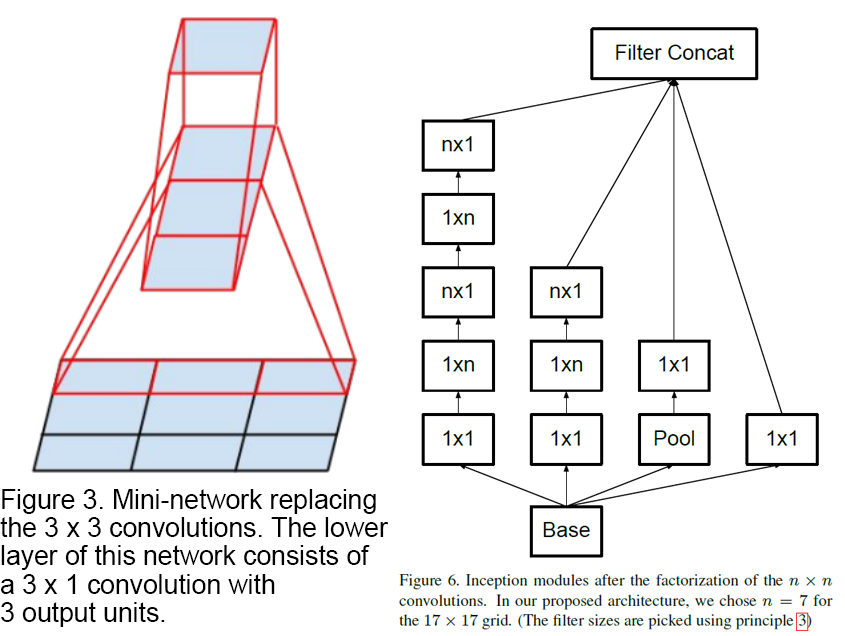

이렇게 3x3을 1x3, 3x1로 분해해도 연산량 감소 효과가 있엇음
-> 효율은 Feature map사이즈가 12~20 사이일 때 가장 좋았으며, Inception v2 모델에는 feature map 사이즈가 17인 경우 위 같은 비대칭 합성곱 분해가 적용된 inception module을 사용함



## 4. Utility of Auxiliary Classifiers (보조분류기의 활용)

GoogLeNet 에서는 Auxiliary Classifiers을 활용함
-> 이유 : 신경망의 수렴에 도움이 됨

-> 논문의 저자들이 실험해보니 별다른 효과가 없었음
--> 좀더 깊게 실험해봄

Auxiliary classifiers에 drop out혹은 Batch normalization을 적용하니까 전체적인 성능향상 결과가 나옴 -> auxiliary classifiers에는 정규화 효과가 있을것이라 추정됨

### 토막상식 : Drop out
서로 연결된 연결망에서 특정 확률로 연결망을 삭제하는것
하는 이유 : 모든 신경망이 연결된 채로 학습하는게 마냥 좋은게 아님 -> 과대적합(Overfitting)이 발생함

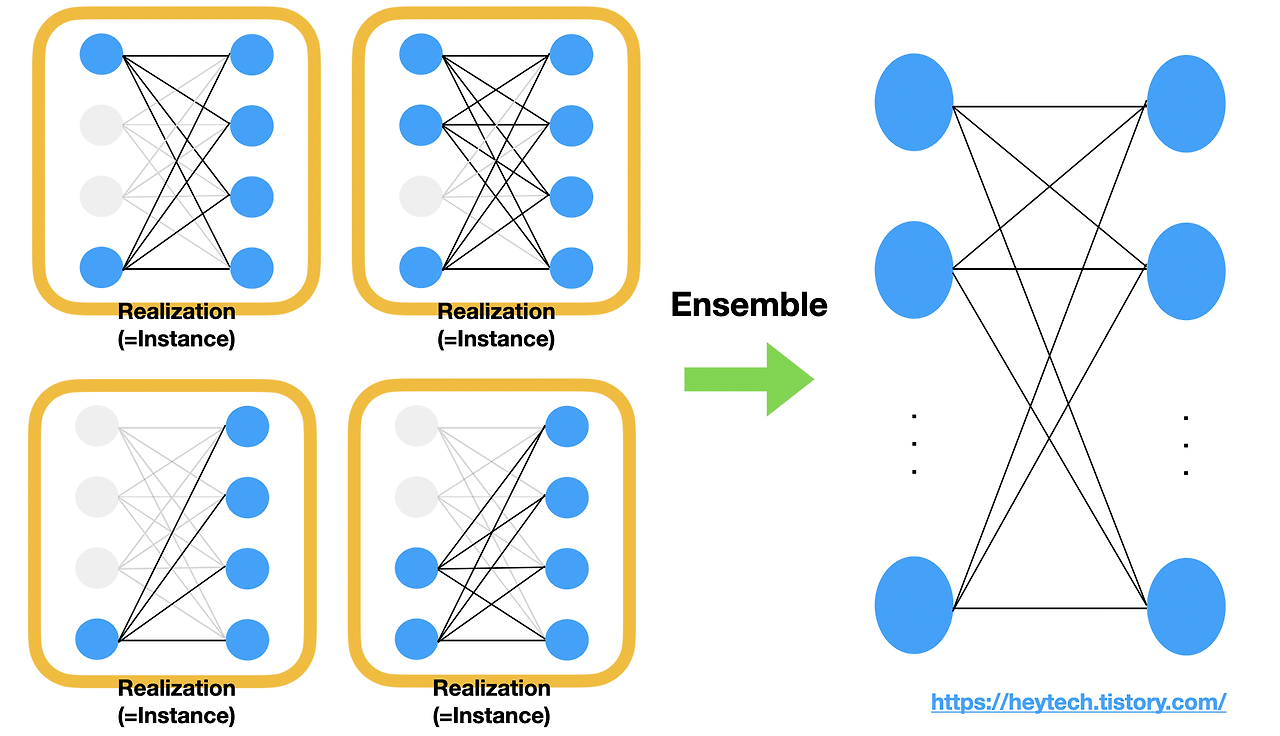

통상 drop out은 0.5(절반만 연결끊음)을 쓴다.

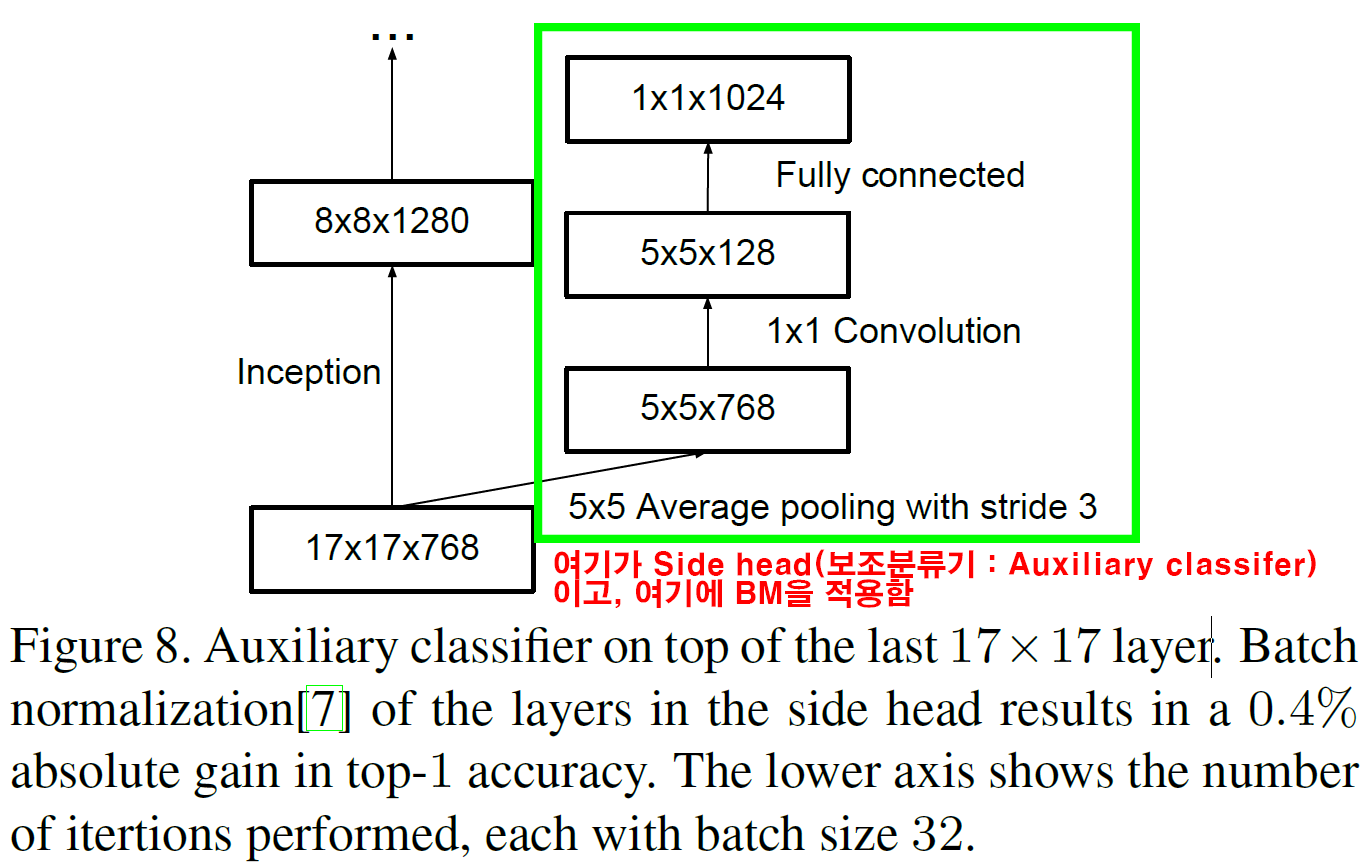

아무튼 위 사진처럼 보조분류기에 BM을 적용하니까 0.4%의 정확도 개선효과를 냈음

## 5. Efficient Grid Size Reduction(효율적인 그리드 크기 축소)

일반적인 CNN신경망 -> Feature map 사이즈를 줄이기 위해 **Pooling**연산 과정을 포함함 -> 동시에 representational bottlenet 현상을 막기 위해 **필터 수**를 증가시킴

ex) dxd 크기를 갖은 K개의 feature map -> Pooling Layer -> (d/2)x(d/2)크기를 갖는 2k개의 feature map이 됨

이러한 Pooling과정의 장/단점 : 연산량 감소, 표현력(representation)감소
-> 이 representation이 감소하는 이유 : 정보손실

논문의 제안 : representation의 감소를 막으면서 연산량은 어케 감소시킬까??

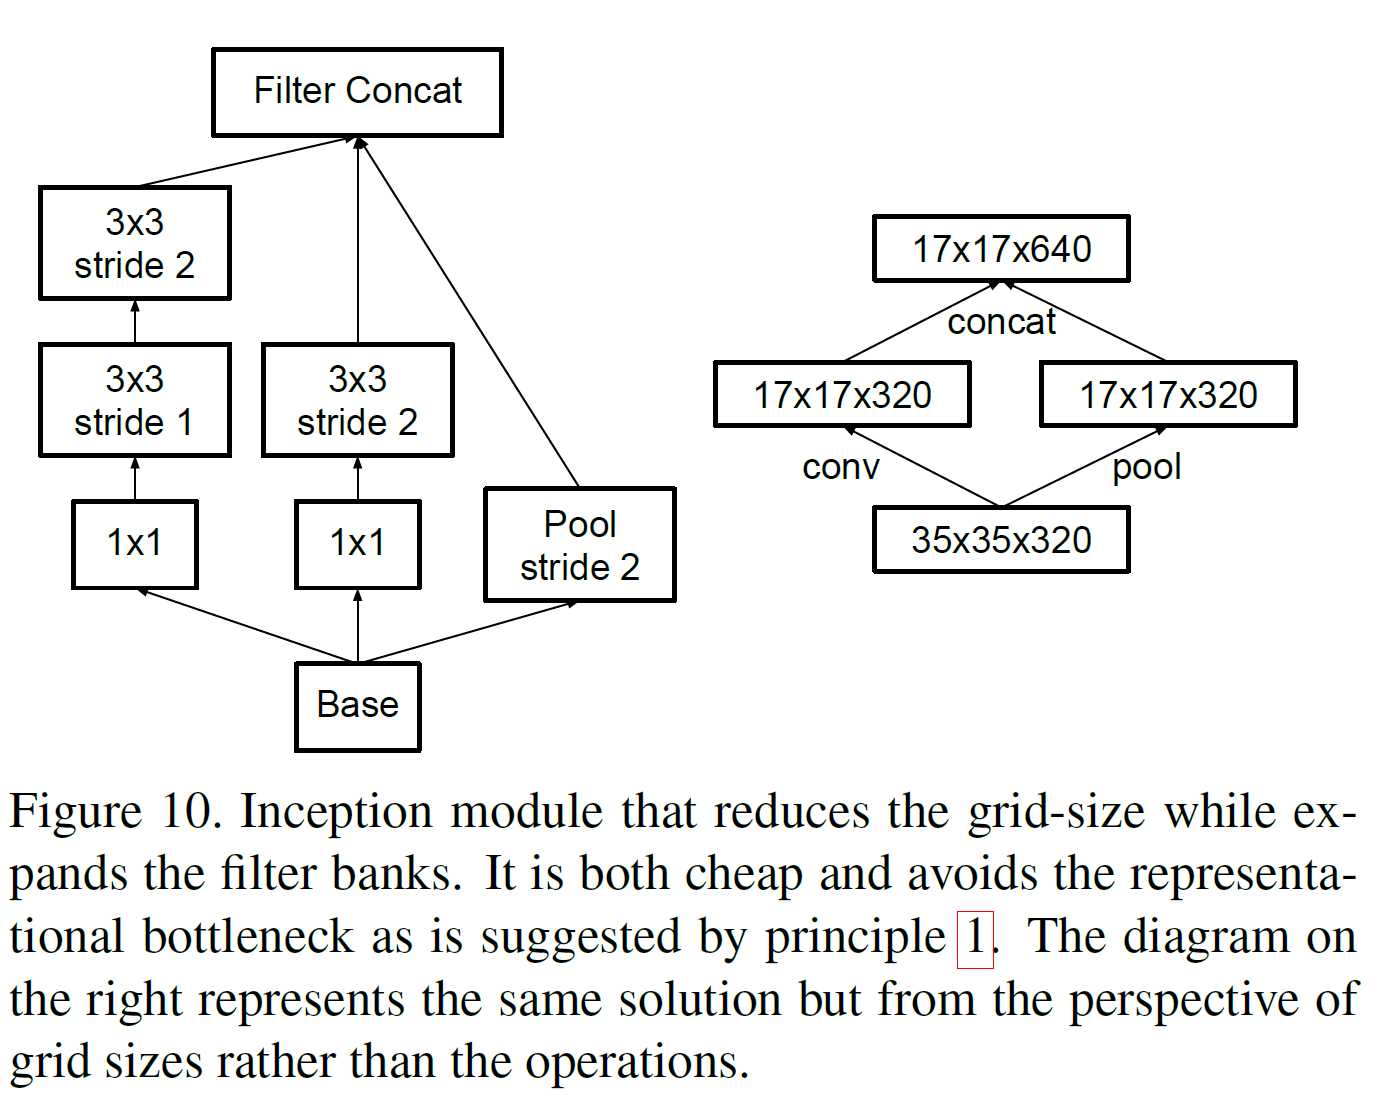

위 사진처럼 pooling layer와 conv layer를 병렬로 처리함
-> 이러면 representation의 감소를 막으면서 연산량을 감소시킬 수 있음

## 6. Inception-v2

지금까지 설명한 그리드 감소, BM이 적용된 보조분류기, 비대칭 합성곱 분해 기술을 도입한게 **Inception-v2** 임

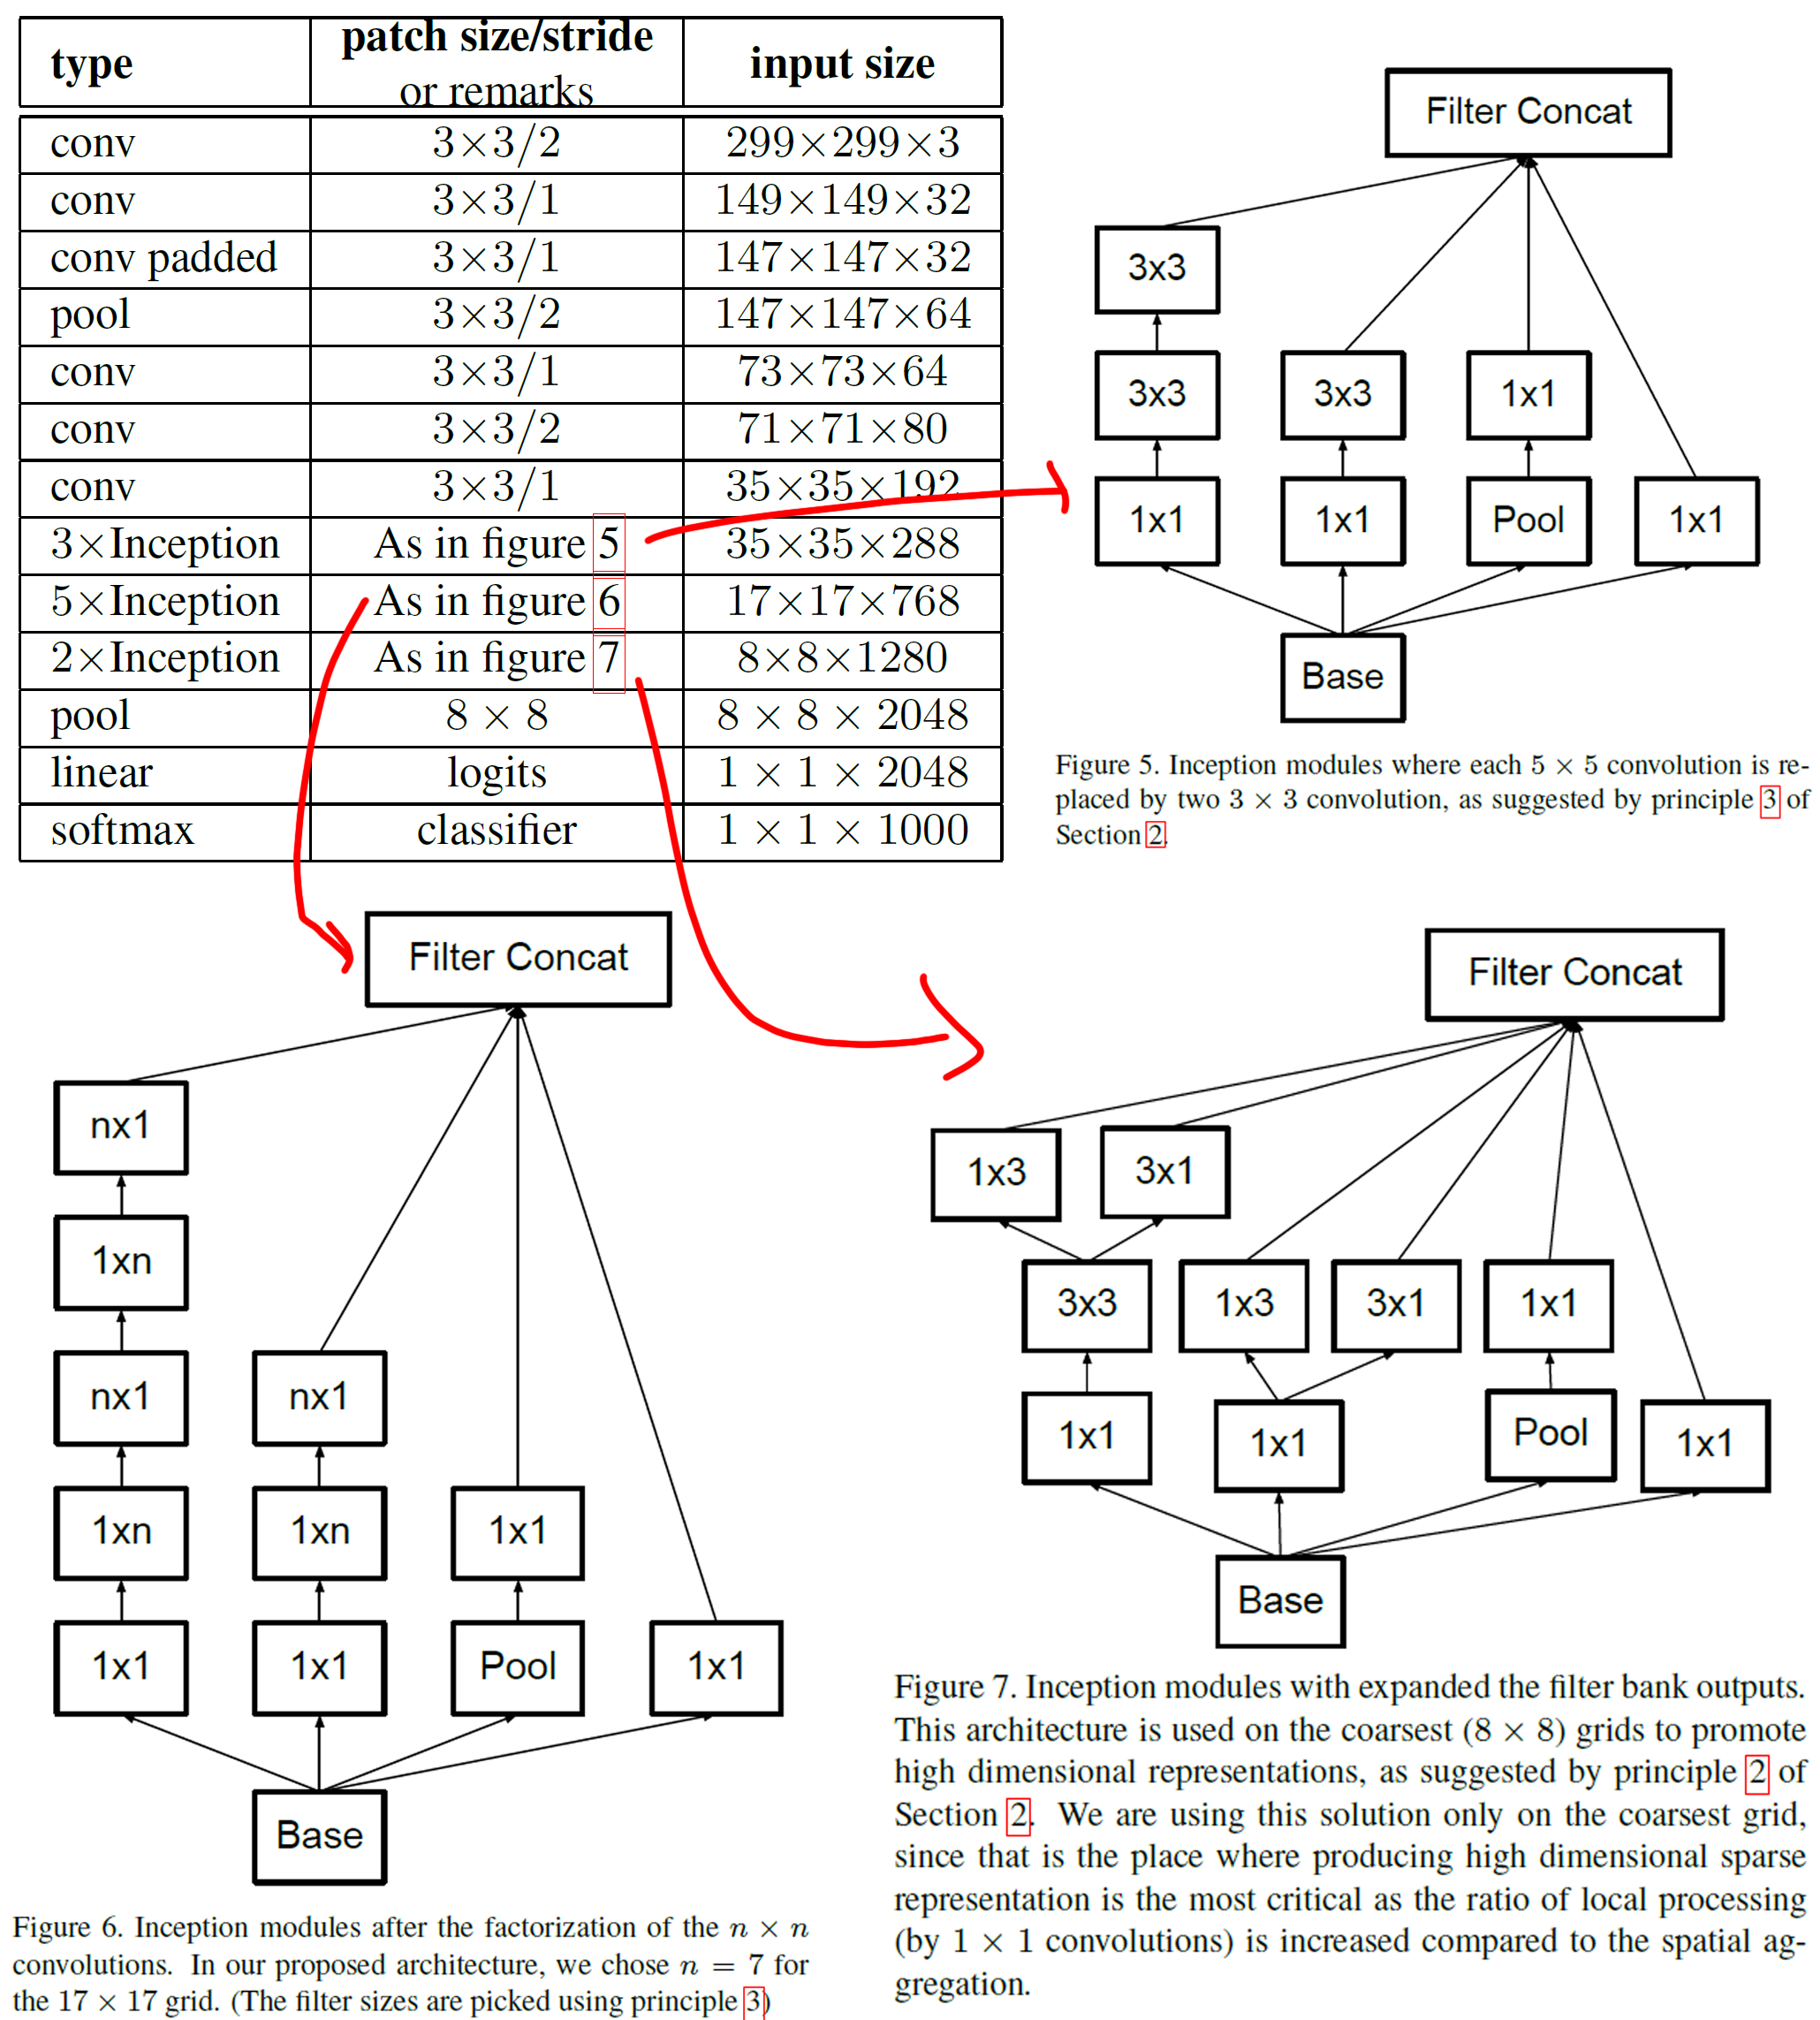

위 표와 사진처럼 **Inception-v2**는 42층 신경망으로 구성되어 있고 GoogLeNet보다는 연산량이 2.5배 많고, VGGNet랑 비슷한 연산량을 가짐

## 7. Model Regularization via Label Smoothing

다음으로 데이터 정규화 기술중 하나로 모델보정(Model Regularization)의 기술을 도입하는데 그 기법이 라벨 스무딩(Label Smoothing)임

원리는 간단함 : 정답지에 라벨을 붙이는데 이건 누가 봐도 검정/흰색 같이 명백하기 나뉘는 라벨은 0, 1로 라벨지를 붙이지만
애매하게 시베리안 허스키 vs 말라뮤트 같이 사람도 구분하기 힘든건 0.7 0.3같이 애매한 확률값으로 라벨지를 붙인다는 거임

## 8~10. Inception-v3 및 실험결과

Inception-v3은 Inception-v2에서 BN-auxiliary + RMSProp + Label Smoothing + Factorized 7x7 을 다 적용한 모델

실험은 크게 3가지 : Single-crop, Single-Model & Multi-crop, Ensemble평가 세가지를 수행함

여기서 Single-crop, Multi-crop 실험?

평가에 사용하는 이미지를 특정 조건으로 처리해서 각 모델에 입력시키는 실험 방식인데

이 조건이 예를 들어 중앙 지역만 Crop한 이미지만 평가용으로 쓴다 -> single-crop
중앙 지역 외 다른 지역들도 Crop한 이미지를 평가용으로 쓴다 -> Multi-crop

여러 모델의 예측을 결합하여 평가를 수행 -> Ensemble평가(앙상블 평가)

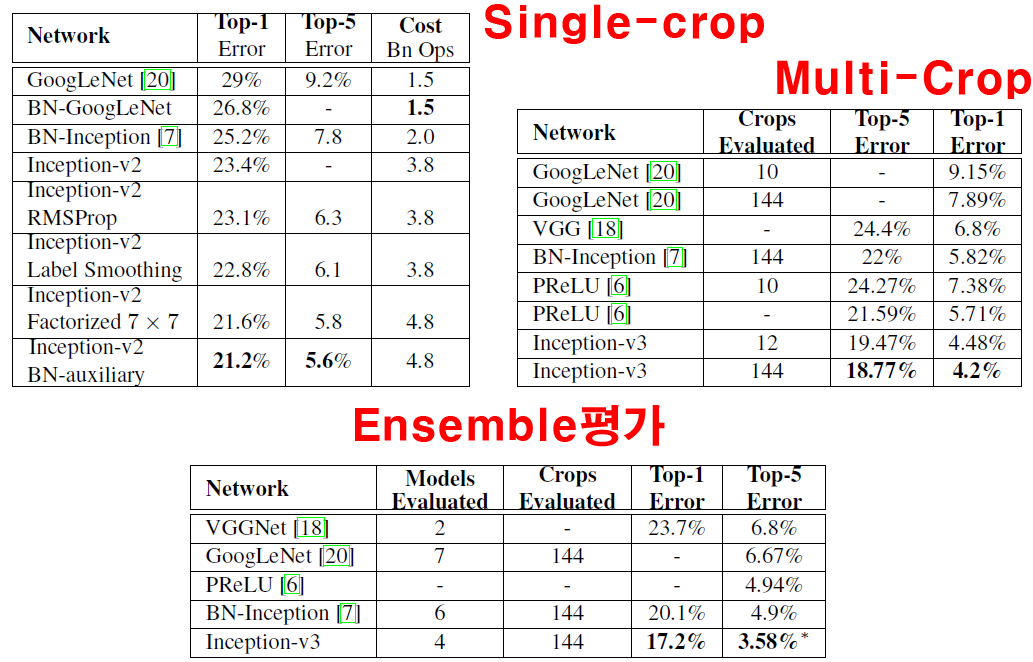

 Inception-v3 모델을 이제 만들어보자


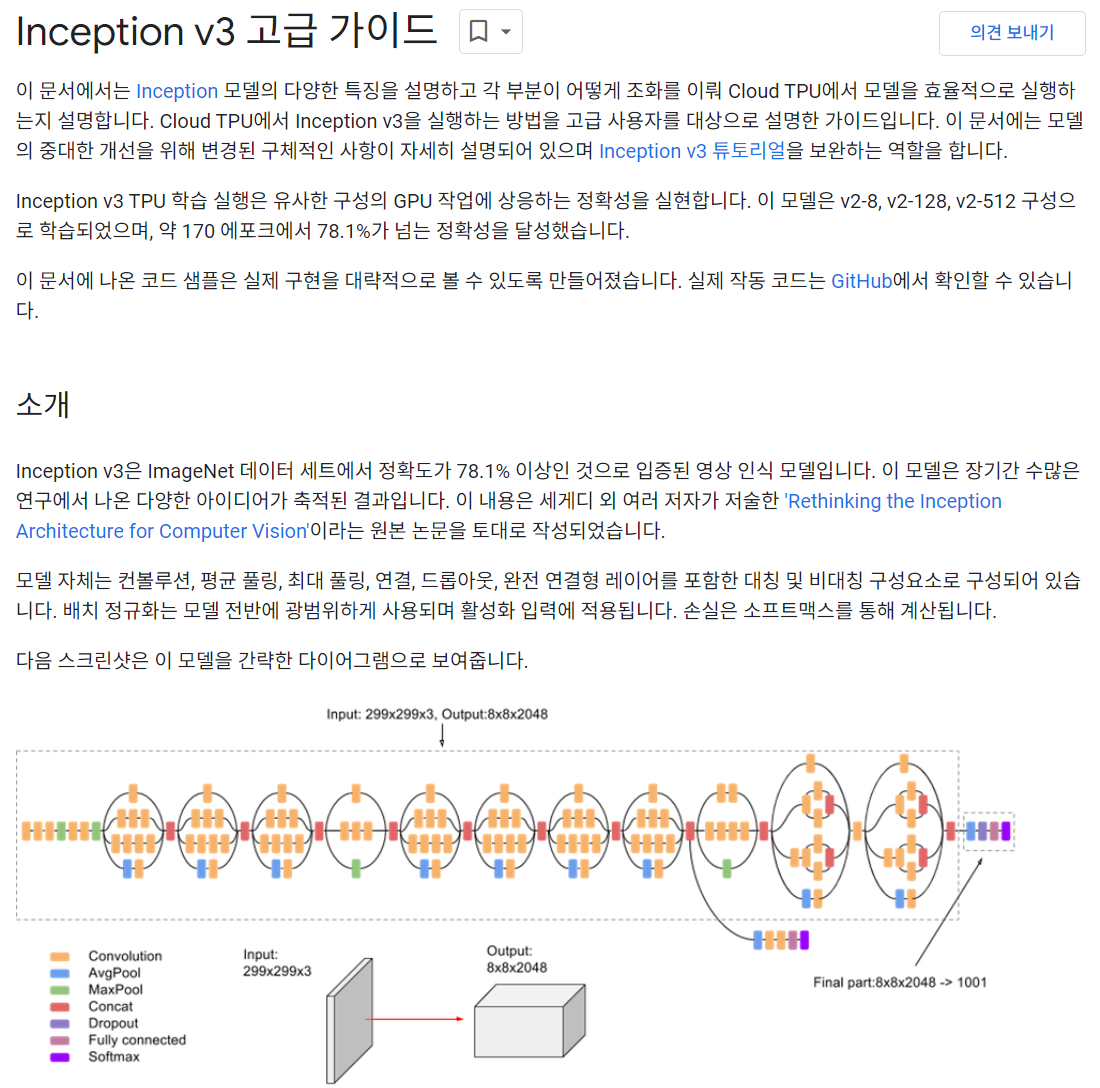

아래는 Inception-v2 모델 구조 사진이다

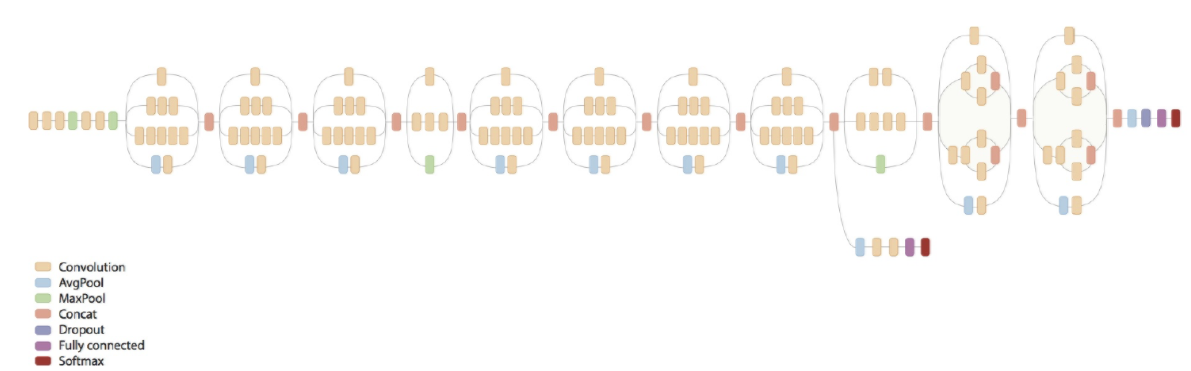

사실 네트워크의 구조는 V2나 V3이 동일하다 봐도 무방하고
일부 파라미터나 기능만 좀 변경된게 V3이다.

변경된 내용은 아래와 같다.

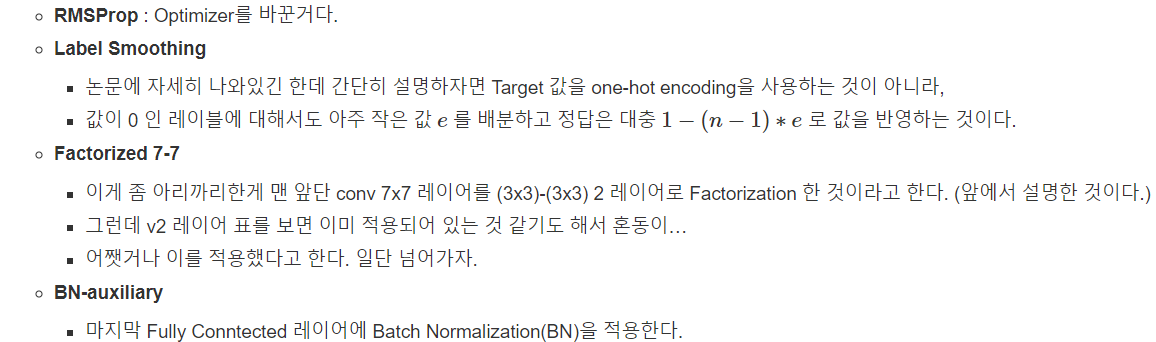

https://velog.io/@krec7748/Inception-Net-v2-v3
설계도는 위 블로그를 따라한다.

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F #이거는 활성화 함수 모듈
import torch.optim as optim #이거는 옵티마이저 함수 모듈

from torchsummary import summary #설계한 모델의 요약본 출력 모듈



In [2]:
#기본 Conv레이어 클래스 만들기

class BasicConv2d(nn.Module):
    def __init__(self, in_channels, out_channels, **kwargs):
        super().__init__()

        self.conv = nn.Conv2d(in_channels, out_channels, bias = False, **kwargs)
        self.batchnorm = nn.BatchNorm2d(out_channels, eps = 0.001)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

기본 클래스에 대한 설명
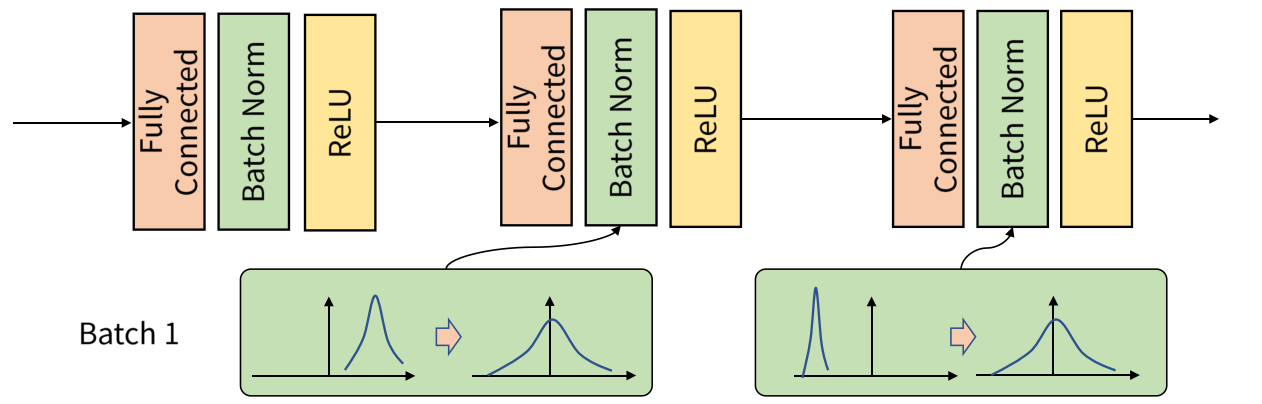

여기까지 넘어왔으면 딥러닝 네트워크는 딱 저 3개의 함수가 기본으로 붙어서 간다 보면 된다.

그럼 각 메서드별 주요 함수 설명을 진행한다.

```self.conv = nn.Conv2d( **kwargs)```
여기서 **kwargs는 적용하는 Kernal의 필터 종류가 천차만별이니 그걸 퉁쳐서 한번에 받겠다는 뜻이다.

파이썬에서 키워드 인자(keyword arguments)를 무제한으로 받을 수 있는 매개변수를 의미함.


```nn.BatchNorm2d(out_channels, eps = 0.001)```
정규화를 수행해주는 함수이고 
$$ y = \frac{x - E[x]}{\sqrt{Var[x] + \epsilon}} * \gamma + \beta $$

eps만 건드는거 같은데 $\epsilon$ 여기에 값이 0이면 상황에 따라 NaN이 발생함





### 다음으로 inception Module 설계

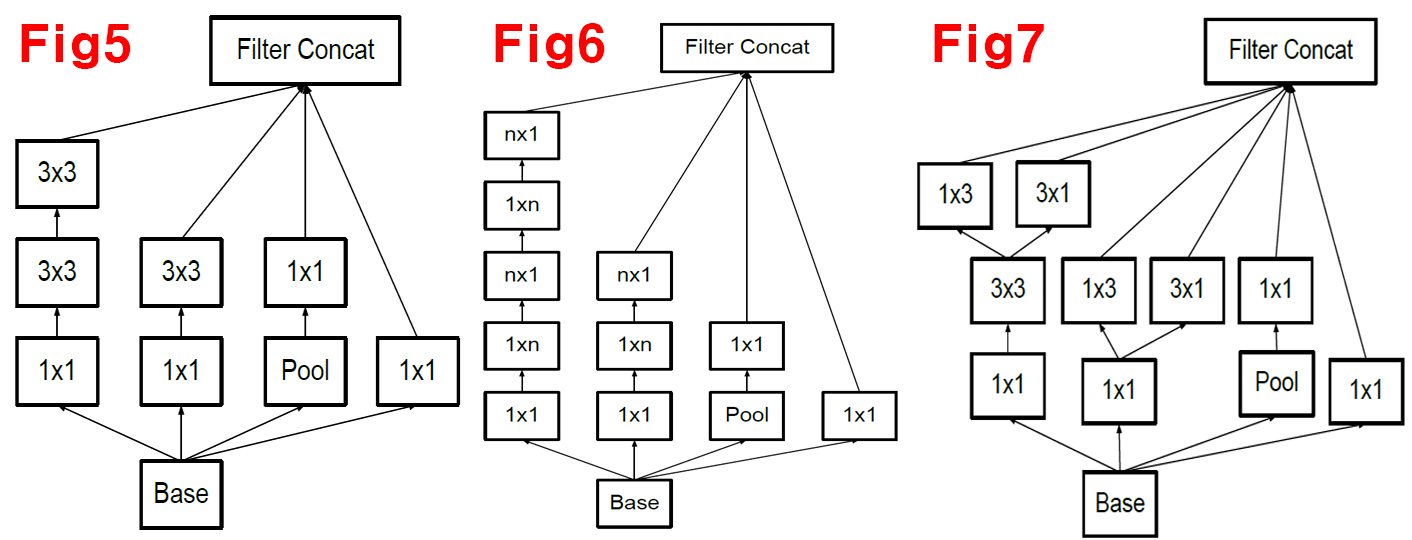

이걸 만든다 보면 된다.

In [3]:
class InceptionF5(nn.Module): # Figure 5
    def __init__(self, in_channels):
        super().__init__()
        
        self.branch1 = nn.Sequential(
            BasicConv2d(in_channels, 64, kernel_size = 1),
            BasicConv2d(64, 96, kernel_size = 3, padding = 1),
            BasicConv2d(96, 96, kernel_size = 3, padding = 1),
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, 48, kernel_size = 1),
            BasicConv2d(48, 64, kernel_size = 3, padding = 1),
        )

        self.branch3 = nn.Sequential(
            nn.MaxPool2d(kernel_size = 3, stride = 1, padding = 1),
            BasicConv2d(in_channels, 64, kernel_size = 1),
        )
        
        self.branch4 = BasicConv2d(in_channels, 64, kernel_size = 1)

    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.branch4(x)], dim = 1)

In [4]:
class InceptionF6(nn.Module): # Figure 6
    def __init__(self, in_channels, f_7x7):
        super().__init__()

        self.branch1 = nn.Sequential(
            BasicConv2d(in_channels, f_7x7, kernel_size = 1),
            BasicConv2d(f_7x7, f_7x7, kernel_size = (1, 7), padding = (0, 3)),
            BasicConv2d(f_7x7, f_7x7, kernel_size = (7, 1), padding = (3, 0)),
            BasicConv2d(f_7x7, f_7x7, kernel_size = (1, 7), padding = (0, 3)),
            BasicConv2d(f_7x7, 192, kernel_size = (7, 1), padding = (3, 0)),
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, f_7x7, kernel_size = 1),
            BasicConv2d(f_7x7, f_7x7, kernel_size = (1, 7), padding = (0, 3)),
            BasicConv2d(f_7x7, 192, kernel_size = (7, 1), padding = (3, 0)),
        )

        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride = 1, padding = 1),
            BasicConv2d(in_channels, 192, kernel_size = 1),
        )

        self.branch4 = BasicConv2d(in_channels, 192, kernel_size = 1)
    
    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x), self.branch4(x)], dim = 1)

In [5]:
class InceptionF7(nn.Module): # Figure 7
    def __init__(self, in_channels):
        super().__init__()

        self.branch1_stem = nn.Sequential(
            BasicConv2d(in_channels, 448, kernel_size = 1),
            BasicConv2d(448, 384, kernel_size = 3, padding = 1),
        )
        self.branch1_left = BasicConv2d(384, 384, kernel_size = (1, 3), padding = (0, 1))
        self.branch1_right = BasicConv2d(384, 384, kernel_size = (3, 1), padding = (1, 0))

        self.branch2_stem = BasicConv2d(in_channels, 384, kernel_size = 1)
        self.branch2_left = BasicConv2d(384, 384, kernel_size = (1, 3), padding = (0, 1))
        self.branch2_right = BasicConv2d(384, 384, kernel_size = (3, 1), padding = (1, 0))

        self.branch3 = nn.Sequential(
            nn.MaxPool2d(3, stride = 1, padding = 1),
            BasicConv2d(in_channels, 192, kernel_size = 1)
        )

        self.branch4 = BasicConv2d(in_channels, 320, kernel_size = 1)

    def forward(self, x):
        branch1_stem = self.branch1_stem(x)
        branch2_stem = self.branch2_stem(x)

        branch1 = torch.cat([self.branch1_left(branch1_stem), self.branch1_right(branch1_stem)], dim = 1)
        branch2 = torch.cat([self.branch2_left(branch2_stem), self.branch2_right(branch2_stem)], dim = 1)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        return torch.cat([branch1, branch2, branch3, branch4], dim = 1)

### 그리드 크기 축소 모듈

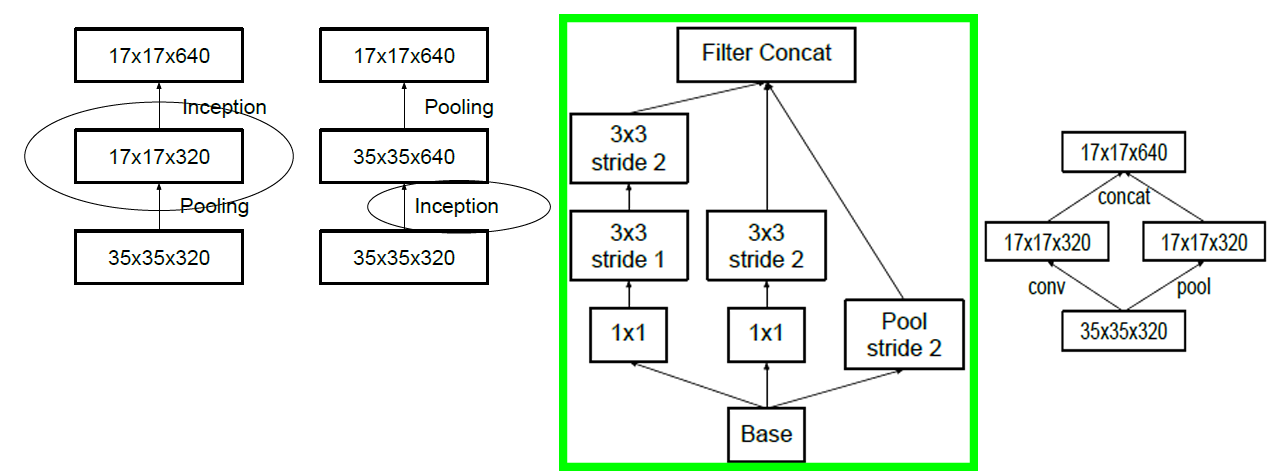

위 그리드 크기 축소 모듈이 적용된 Inception_Reduce도 따로 만들어 줘야함 
코드 구성을 보니 A버전, B버전이 있는데 살짝 구성이 다른 정도임

In [6]:
class Inception_ReduceA(nn.Module): # Figure 10 : conv (stride 2) -> pooling operation, 
    # 사람들 마다 코드가 조금씩 달라 pytorch source code를 이용.
    def __init__(self, in_channels):
        super().__init__()

        self.branch1 = nn.Sequential(
            BasicConv2d(in_channels, 64, kernel_size = 1),
            BasicConv2d(64, 96, kernel_size = 3, padding = 1),
            BasicConv2d(96, 96, kernel_size = 3, stride = 2),
        )

        self.branch2 = BasicConv2d(in_channels, 384, kernel_size = 3, stride = 2)
        self.branch3 = nn.MaxPool2d(3, stride = 2)

    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x)], dim = 1)

class Inception_ReduceB(nn.Module): # Figure 10 : conv (stride 2) -> pooling operation
    # 사람들 마다 코드가 조금씩 달라 pytorch source code를 이용.
    def __init__(self, in_channels):
        super().__init__()

        self.branch1 = nn.Sequential(
            BasicConv2d(in_channels, 192, kernel_size = 1),
            BasicConv2d(192, 192, kernel_size = (1, 7), padding = (0, 3)),
            BasicConv2d(192, 192, kernel_size = (7, 1), padding = (3, 0)),
            BasicConv2d(192, 192, kernel_size = 3, stride = 2)
        )

        self.branch2 = nn.Sequential(
            BasicConv2d(in_channels, 192, kernel_size = 1),
            BasicConv2d(192, 320, kernel_size = 3, stride = 2),
        )

        self.branch3 = nn.MaxPool2d(3, stride = 2)

    def forward(self, x):
        return torch.cat([self.branch1(x), self.branch2(x), self.branch3(x)], dim = 1)

### 마지막으로 보조분류기 (Auxiliary classifier)
GoogLeNet이 inception module v1에 속하니까 V3도 당연히 있음

In [7]:
class Inception_Aux(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.avgpool = nn.AdaptiveAvgPool2d((5, 5)) # paper에는 nn.AvgPool2d(kernel_size = 5, stride = 3)
        self.conv = BasicConv2d(in_channels, 128, kernel_size = 1)
        self.fc1 = nn.Linear(5 * 5 * 128, 1024)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.7)
        self.fc2 = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.avgpool(x)     # N x 768 x 17 x 17 -> N x 768 x 5 x 5 
        x = self.conv(x)        # N x 768 x 5 x 5 -> N x 128 x 5 x 5

        x = torch.flatten(x, 1) # N x 128 x 5 x 5 -> N x 3200

        x = self.fc1(x)         # N x 3200 -> N x 1024
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)         # N x 1024 -> N x 1000
        return x


위 모듈들을 기반으로 모델 설계

In [8]:
class Inception_V3(nn.Module):
    def __init__(self, in_channels, num_classes, aux_logits = True, drop_p = 0.5):
        super(Inception_V3, self).__init__()
        assert aux_logits == True or aux_logits == False #aux_logits는 무조건 T/F값만 갖는다.
        self.aux_logits = aux_logits

        self.conv1a = BasicConv2d(in_channels, 32, kernel_size = 3, stride = 2)
        self.conv1b = BasicConv2d(32, 32, kernel_size = 3)
        self.conv1c = BasicConv2d(32, 64, kernel_size = 3, padding = 1)

        self.pool1 = nn.MaxPool2d(3, stride = 2)
        
        self.conv2a = BasicConv2d(64, 80, kernel_size = 3)
        self.conv2b = BasicConv2d(80, 192, kernel_size = 3, stride = 2)
        self.conv2c = BasicConv2d(192, 288, kernel_size = 3, padding = 1)

        self.inception3a = InceptionF5(288)
        self.inception3b = InceptionF5(288)
        self.inception3c = InceptionF5(288)

        self.inception_red1 = Inception_ReduceA(288)

        self.inception4a = InceptionF6(768, f_7x7 = 128)
        self.inception4b = InceptionF6(768, f_7x7 = 160)
        self.inception4c = InceptionF6(768, f_7x7 = 160)
        self.inception4d = InceptionF6(768, f_7x7 = 160)
        self.inception4e = InceptionF6(768, f_7x7 = 192)

        if aux_logits:
            self.aux = Inception_Aux(768, num_classes = num_classes)

        self.inception_red2 = Inception_ReduceB(768)

        self.inception5a = InceptionF7(1280)
        self.inception5b = InceptionF7(2048)

        self.pool6 = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(p = drop_p)
        self.fc = nn.Linear(2048, num_classes)
    
    def forward(self, x):

        x = self.conv1a(x)  # -> N x 32 x 149 x 149
        x = self.conv1b(x)  # -> N x 32 x 147 x 147
        x = self.conv1c(x)  # -> N x 64 x 147 x 147

        x = self.pool1(x)   # -> N x 64 x 73 x 73

        x = self.conv2a(x)  # -> N x 80 x 71 x 71
        x = self.conv2b(x)  # -> N x 192 x 35 x 35
        x = self.conv2c(x)  # -> N x 288 x 35 x 35

        x = self.inception3a(x) # -> N x (96 + 64 * 3) x 35 x 35 = N x 288 x 35 x 35
        x = self.inception3b(x) # -> N x 288 x 35 x 35
        x = self.inception3c(x) # -> N x 288 x 35 x 35

        x = self.inception_red1(x)  # -> N x 768 x 17 x 17

        x = self.inception4a(x) # -> N x (192 * 4) x 17 x 17 = N x 768 x 17 x 17
        x = self.inception4b(x) # -> N x 768 x 17 x 17
        x = self.inception4c(x) # -> N x 768 x 17 x 17
        x = self.inception4d(x) # -> N x 768 x 17 x 17
        x = self.inception4e(x) # -> N x 768 x 17 x 17

        if self.aux is not None and self.training:
                    aux = self.aux(x)
        else:
            aux = None  # Not defined error 방지
        
        x = self.inception_red2(x) # -> N x 1280 x 8 x 8

        x = self.inception5a(x) # -> N x (384 * 2 * 2 + 192 + 320) x 8 x 8 = N x 2048 x 8 x 8
        x = self.inception5b(x) # -> N x 2048 x 8 x 8
        x = self.pool6(x)       # -> N x 2048 x 1 x 1

        x = torch.flatten(x, 1) # -> N x 2048
        
        x = self.dropout(x)
        x = self.fc(x) # -> N x 1000

        if self.training:
            return [x, aux]
        else:
            return x

In [9]:
## 데이터셋 가져오기

import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

train_raw_data = datasets.CIFAR10("data", 
                                   train=True, 
                                   download=True, 
                                   transform=transforms.ToTensor())
test_raw_data = datasets.CIFAR10("data", 
                                   train=False, 
                                   download=True, 
                                   transform=transforms.ToTensor())

#귀찮으니까 10으로 하자...

Files already downloaded and verified
Files already downloaded and verified


In [10]:
import numpy as np

#이미지 전처리11 : RGB채널별 평균/표준편차 계산 함수 설계
def normal_parm_func(input_data):

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in input_data]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in input_data]

    RGB_mean_list, RGB_std_list = [], []

    for i in range(3):
        RGB_mean_list.append(
            np.mean([m[i] for m in meanRGB])
        )
        RGB_std_list.append(
            np.mean([s[i] for s in stdRGB])
        )

    return RGB_mean_list, RGB_std_list


proc_train_data = normal_parm_func(train_raw_data)
proc_test_data = normal_parm_func(test_raw_data)

print(f"Train Mean: {[format(m, '.3f') for m in proc_train_data[0]]}, \
      Train Std: {[format(s, '.3f') for s in proc_train_data[1]]}")
print(f"Test Mean: {[format(m, '.3f') for m in proc_test_data[0]]}, \
      Test Std: {[format(s, '.3f') for s in proc_test_data[1]]}")

Train Mean: ['0.491', '0.482', '0.447'],       Train Std: ['0.202', '0.199', '0.201']
Test Mean: ['0.494', '0.485', '0.450'],       Test Std: ['0.202', '0.199', '0.201']


In [11]:
#이미지 전처리 2

#이미지 변환방식이 저장된 객체 생성
train_transformation = transforms.Compose([
    transforms.ToTensor(), 
    #입력하려는 train_raw데이터가 텐서 자료형이지만
    #이걸 안써주면 PIL자료형이 되버림...
    transforms.RandomResizedCrop((299, 299)), #Inception_V3 입력 이미지는 299 299 3임
    #참고로 그냥 Resize하지 말고 이번에는 랜덤으로 Crop한 후의 이미지를 Resize해보자


    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # 색상 조정
    transforms.RandomResizedCrop(224),  # 이미지 크기 재조정 및 무작위 크롭
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),  # -10도에서 10도 사이로 무작위 회전

    ##성능이 너무 안나와서 데이터 증강기법을 더 적용함

    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((299, 299)), #Inception_V3 입력 이미지는 299 299 3임
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])

#이미지에 위 변환방식을 적용
train_raw_data.transform = train_transformation
test_raw_data.transform = test_transformation

#데이터 로더 생성 -> 여기서 Batch_size를 정의함
train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=128, shuffle=False)


In [12]:
#데이터로더 속성정보 출력 함수
#위 설정한 변수의 속성정보 출력하기
def count_images_and_labels(loader):
    num_images = 0
    label_set = set()
    for data, labels in loader:
        num_images += data.size(0)
        label_set.update(labels.tolist())
    
    return num_images, len(label_set)


train_images, train_label_count = count_images_and_labels(train_loader)
test_images, test_label_count = count_images_and_labels(test_loader)

print(f"Training Images: {train_images}, Unique Labels: {train_label_count}")
print(f"Testing Images: {test_images}, Unique Labels: {test_label_count}")


Training Images: 50000, Unique Labels: 10
Testing Images: 10000, Unique Labels: 10


In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090
GPU Capability: (8, 9)
Total Memory: 23.99 GB
Number of GPUs: 1


In [14]:
ex_model = Inception_V3(in_channels = 3, num_classes=train_label_count, aux_logits=True)
#num_classes는 훈련시키는 학습데이터의 라벨 클래스 개수에 따라 달라진다
#위 라벨 개수를 출력하여 저장한 변수값을 여기에 사용하자
#GoogleNet부터는 보조분류기의 활성화 유/무도 알아야 해서 이를 매개변수값으로 넘겨준다.
ex_model.to(device)


#설계한 모델이 정상동작하는지 확인하는 코드
try:
    summary(ex_model, input_size=(3, 224, 224), device='cuda')
except Exception as e:
    print(f"Error occurred during torchsummary execution: {e}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 111, 111]             864
       BatchNorm2d-2         [-1, 32, 111, 111]              64
              ReLU-3         [-1, 32, 111, 111]               0
       BasicConv2d-4         [-1, 32, 111, 111]               0
            Conv2d-5         [-1, 32, 109, 109]           9,216
       BatchNorm2d-6         [-1, 32, 109, 109]              64
              ReLU-7         [-1, 32, 109, 109]               0
       BasicConv2d-8         [-1, 32, 109, 109]               0
            Conv2d-9         [-1, 64, 109, 109]          18,432
      BatchNorm2d-10         [-1, 64, 109, 109]             128
             ReLU-11         [-1, 64, 109, 109]               0
      BasicConv2d-12         [-1, 64, 109, 109]               0
        MaxPool2d-13           [-1, 64, 54, 54]               0
           Conv2d-14           [-1, 80,

### V3의 옵티마이저는 RMSprop를 사용한다.

In [15]:
#옵티마이저 및 로스 암수 정의하기
lr = 0.001 #블로그에서는 좀 더 작은 값으로 움직이게 함

# 모든 파라미터의 requires_grad를 False로 설정
for parameter in ex_model.parameters():
    parameter.requires_grad = False

# 마지막 선형 계층의 파라미터만 학습하도록 설정
for name, parameter in ex_model.named_parameters():
    if 'fc' in name:  # 'fc'는 일반적으로 모델의 마지막 선형 계층을 나타냅니다.
        parameter.requires_grad = True
    # print(f"{name} requires_grad: {parameter.requires_grad}")

criterion = nn.CrossEntropyLoss(reduction='mean') #로스함수는 CEL 사용

optimizer = optim.RMSprop(filter(lambda p: p.requires_grad, ex_model.parameters()), lr=lr)
#LR값은 0.001로 좀 더 큰 스텝으로 움직이게 한다
#옵티마이저에 처음 주는 파라미터값은 마지막 fc레이어의 값만 주고 시작한다

#흠 뭔가 어렵네...

In [16]:
from tqdm import tqdm #훈련 진행상황 체크

def model_train(model, data_loader, loss_fn, optimizer_fn, processing_device):

    model.train() #모델을 훈련 모드로 설정

    #loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, corr = 0, 0, 0

    progress_bar = tqdm(data_loader) #이때 사용되는 데이터는 훈련용 데이터


    for batch_idx, (image, label) in enumerate(progress_bar, start=1):
        #입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        #전사과정 수행
        pred0, pred1 = model(image) #출력이 2개 나온다.

        loss_0 = criterion(pred0, label)
        loss_1 = criterion(pred1, label) #출력별 loos중간결과값을 계산함
        
        loss = loss_0 + 0.3*(loss_1)

        #옵티마이저의 Gradient 초기화
        optimizer_fn.zero_grad()

        #backward 과정 수행
        loss.backward() #Backprogration을 진행하여 Gradient계산
        optimizer_fn.step() #계산된 gradient(모델 파라미터)를 업데이트


        #여기부터는 학습이 잘 되고 있는지 확인하는 부분
        _, pred = pred0.max(dim=1)
        corr += pred.eq(label).sum().item()
        
        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)
        progress_bar.set_description('[Training] loss: ' + \
                            f'{run_loss / run_size:.4f}, accuracy: ' + \
                            f'{corr / run_size:.4f}')
        
    acc = corr / len(data_loader.dataset)

    return run_loss / len(data_loader.dataset), acc

In [17]:
#평가를 위한 구문 작성
def model_evaluate(model, data_loader, loss_fn, processing_device):
    model.eval() #모델을 평가 모드로 전환

    #gradient업데이틀를 방지해주자
    with torch.no_grad():

        #여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, corr = 0, 0


        for image, label in data_loader: #이때 사용되는 데이터는 평가용 데이터
            #입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)


            #평가 결과를 도출하자
            outputs = model(image) #평가모드는 1개만 출력이 나오나보네...

            _, pred = outputs.max(dim=1)

            
            #모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            corr += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(outputs, label).item() * image.size(0)

        # 전체 데이터셋에 대한 평균 손실과 정확도 계산
        acc = corr / len(data_loader.dataset)

        return run_loss / len(data_loader.dataset), acc

In [18]:
#훈련과 검증 실행


min_loss = np.inf
num_epochs = 150
MODEL_NAME = 'Inception_V3'


for epoch in range(num_epochs):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, criterion, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(ex_model, test_loader, criterion, device)   
    
    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')
    
    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, \
          val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

  0%|          | 0/391 [00:00<?, ?it/s]c:\Users\HILS_AMD\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
[Training] loss: 3.2085, accuracy: 0.1218: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


[INFO] val_loss has been improved from inf to 2.40340. Saving Model!
epoch 01, loss: 3.20853, acc: 0.12180,           val_loss: 2.40340, val_accuracy: 0.10130


[Training] loss: 3.0497, accuracy: 0.1340: 100%|██████████| 391/391 [10:20<00:00,  1.59s/it]


[INFO] val_loss has been improved from 2.40340 to 2.35142. Saving Model!
epoch 02, loss: 3.04973, acc: 0.13402,           val_loss: 2.35142, val_accuracy: 0.16210


[Training] loss: 3.0353, accuracy: 0.1390: 100%|██████████| 391/391 [10:18<00:00,  1.58s/it]


[INFO] val_loss has been improved from 2.35142 to 2.28364. Saving Model!
epoch 03, loss: 3.03532, acc: 0.13902,           val_loss: 2.28364, val_accuracy: 0.16240


[Training] loss: 3.0297, accuracy: 0.1427: 100%|██████████| 391/391 [10:15<00:00,  1.57s/it]


[INFO] val_loss has been improved from 2.28364 to 2.26614. Saving Model!
epoch 04, loss: 3.02965, acc: 0.14274,           val_loss: 2.26614, val_accuracy: 0.16880


[Training] loss: 3.0373, accuracy: 0.1435: 100%|██████████| 391/391 [10:20<00:00,  1.59s/it]


epoch 05, loss: 3.03727, acc: 0.14352,           val_loss: 2.29605, val_accuracy: 0.13900


[Training] loss: 3.0217, accuracy: 0.1458: 100%|██████████| 391/391 [10:15<00:00,  1.57s/it]


[INFO] val_loss has been improved from 2.26614 to 2.25617. Saving Model!
epoch 06, loss: 3.02174, acc: 0.14578,           val_loss: 2.25617, val_accuracy: 0.16100


[Training] loss: 3.0312, accuracy: 0.1423: 100%|██████████| 391/391 [10:21<00:00,  1.59s/it]


epoch 07, loss: 3.03121, acc: 0.14232,           val_loss: 2.35975, val_accuracy: 0.17650


[Training] loss: 3.0374, accuracy: 0.1436: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 08, loss: 3.03738, acc: 0.14360,           val_loss: 2.28291, val_accuracy: 0.20160


[Training] loss: 3.0331, accuracy: 0.1427: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 09, loss: 3.03315, acc: 0.14272,           val_loss: 2.30633, val_accuracy: 0.13290


[Training] loss: 3.0241, accuracy: 0.1462: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 10, loss: 3.02408, acc: 0.14620,           val_loss: 2.30917, val_accuracy: 0.12820


[Training] loss: 3.0225, accuracy: 0.1486: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 11, loss: 3.02252, acc: 0.14860,           val_loss: 2.25907, val_accuracy: 0.19280


[Training] loss: 3.0347, accuracy: 0.1412: 100%|██████████| 391/391 [10:22<00:00,  1.59s/it]


epoch 12, loss: 3.03469, acc: 0.14120,           val_loss: 2.25620, val_accuracy: 0.17220


[Training] loss: 3.0286, accuracy: 0.1449: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


[INFO] val_loss has been improved from 2.25617 to 2.21985. Saving Model!
epoch 13, loss: 3.02859, acc: 0.14492,           val_loss: 2.21985, val_accuracy: 0.17350


[Training] loss: 3.0247, accuracy: 0.1451: 100%|██████████| 391/391 [10:23<00:00,  1.60s/it]


epoch 14, loss: 3.02466, acc: 0.14514,           val_loss: 2.22637, val_accuracy: 0.17000


[Training] loss: 3.0306, accuracy: 0.1463: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 15, loss: 3.03065, acc: 0.14630,           val_loss: 2.25299, val_accuracy: 0.20030


[Training] loss: 3.0338, accuracy: 0.1442: 100%|██████████| 391/391 [10:22<00:00,  1.59s/it]


[INFO] val_loss has been improved from 2.21985 to 2.21784. Saving Model!
epoch 16, loss: 3.03381, acc: 0.14422,           val_loss: 2.21784, val_accuracy: 0.18930


[Training] loss: 3.0223, accuracy: 0.1451: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 17, loss: 3.02231, acc: 0.14506,           val_loss: 2.27082, val_accuracy: 0.16980


[Training] loss: 3.0342, accuracy: 0.1411: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


epoch 18, loss: 3.03417, acc: 0.14106,           val_loss: 2.29922, val_accuracy: 0.16450


[Training] loss: 3.0189, accuracy: 0.1485: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 19, loss: 3.01889, acc: 0.14846,           val_loss: 2.25817, val_accuracy: 0.16520


[Training] loss: 3.0295, accuracy: 0.1482: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 20, loss: 3.02953, acc: 0.14818,           val_loss: 2.33498, val_accuracy: 0.11690


[Training] loss: 3.0242, accuracy: 0.1472: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 21, loss: 3.02419, acc: 0.14718,           val_loss: 2.31247, val_accuracy: 0.11990


[Training] loss: 3.0319, accuracy: 0.1437: 100%|██████████| 391/391 [10:22<00:00,  1.59s/it]


epoch 22, loss: 3.03186, acc: 0.14372,           val_loss: 2.27835, val_accuracy: 0.20470


[Training] loss: 3.0327, accuracy: 0.1435: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


epoch 23, loss: 3.03273, acc: 0.14354,           val_loss: 2.32226, val_accuracy: 0.15910


[Training] loss: 3.0257, accuracy: 0.1466: 100%|██████████| 391/391 [10:40<00:00,  1.64s/it]


epoch 24, loss: 3.02573, acc: 0.14662,           val_loss: 2.24533, val_accuracy: 0.15700


[Training] loss: 3.0230, accuracy: 0.1459: 100%|██████████| 391/391 [10:41<00:00,  1.64s/it]


epoch 25, loss: 3.02304, acc: 0.14588,           val_loss: 2.27737, val_accuracy: 0.19790


[Training] loss: 3.0315, accuracy: 0.1401: 100%|██████████| 391/391 [10:48<00:00,  1.66s/it]


epoch 26, loss: 3.03149, acc: 0.14014,           val_loss: 2.22149, val_accuracy: 0.20420


[Training] loss: 3.0264, accuracy: 0.1449: 100%|██████████| 391/391 [10:59<00:00,  1.69s/it]


epoch 27, loss: 3.02640, acc: 0.14488,           val_loss: 2.26245, val_accuracy: 0.16140


[Training] loss: 3.0203, accuracy: 0.1442: 100%|██████████| 391/391 [10:47<00:00,  1.66s/it]


epoch 28, loss: 3.02032, acc: 0.14418,           val_loss: 2.44059, val_accuracy: 0.11830


[Training] loss: 3.0298, accuracy: 0.1432: 100%|██████████| 391/391 [10:46<00:00,  1.65s/it]


epoch 29, loss: 3.02977, acc: 0.14324,           val_loss: 2.31669, val_accuracy: 0.15070


[Training] loss: 3.0260, accuracy: 0.1474: 100%|██████████| 391/391 [10:30<00:00,  1.61s/it]


[INFO] val_loss has been improved from 2.21784 to 2.20126. Saving Model!
epoch 30, loss: 3.02602, acc: 0.14738,           val_loss: 2.20126, val_accuracy: 0.19460


[Training] loss: 3.0334, accuracy: 0.1424: 100%|██████████| 391/391 [10:39<00:00,  1.63s/it]


epoch 31, loss: 3.03342, acc: 0.14242,           val_loss: 2.34569, val_accuracy: 0.14390


[Training] loss: 3.0240, accuracy: 0.1424: 100%|██████████| 391/391 [10:38<00:00,  1.63s/it]


epoch 32, loss: 3.02400, acc: 0.14242,           val_loss: 2.31876, val_accuracy: 0.14330


[Training] loss: 3.0275, accuracy: 0.1443: 100%|██████████| 391/391 [10:27<00:00,  1.61s/it]


epoch 33, loss: 3.02747, acc: 0.14434,           val_loss: 2.36287, val_accuracy: 0.15050


[Training] loss: 3.0220, accuracy: 0.1478: 100%|██████████| 391/391 [10:29<00:00,  1.61s/it]


epoch 34, loss: 3.02198, acc: 0.14782,           val_loss: 2.29648, val_accuracy: 0.15540


[Training] loss: 3.0228, accuracy: 0.1470: 100%|██████████| 391/391 [10:42<00:00,  1.64s/it]


epoch 35, loss: 3.02279, acc: 0.14704,           val_loss: 2.41980, val_accuracy: 0.16070


[Training] loss: 3.0307, accuracy: 0.1423: 100%|██████████| 391/391 [10:47<00:00,  1.66s/it]


epoch 36, loss: 3.03065, acc: 0.14226,           val_loss: 2.22568, val_accuracy: 0.16650


[Training] loss: 3.0216, accuracy: 0.1429: 100%|██████████| 391/391 [10:49<00:00,  1.66s/it]


epoch 37, loss: 3.02159, acc: 0.14286,           val_loss: 2.22152, val_accuracy: 0.17170


[Training] loss: 3.0312, accuracy: 0.1422: 100%|██████████| 391/391 [10:25<00:00,  1.60s/it]


epoch 38, loss: 3.03115, acc: 0.14222,           val_loss: 2.34071, val_accuracy: 0.17420


[Training] loss: 3.0319, accuracy: 0.1441: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 39, loss: 3.03190, acc: 0.14412,           val_loss: 2.38141, val_accuracy: 0.16160


[Training] loss: 3.0273, accuracy: 0.1430: 100%|██████████| 391/391 [10:16<00:00,  1.58s/it]


epoch 40, loss: 3.02725, acc: 0.14304,           val_loss: 2.35879, val_accuracy: 0.12040


[Training] loss: 3.0233, accuracy: 0.1441: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


epoch 41, loss: 3.02334, acc: 0.14414,           val_loss: 2.31679, val_accuracy: 0.17380


[Training] loss: 3.0318, accuracy: 0.1436: 100%|██████████| 391/391 [10:26<00:00,  1.60s/it]


epoch 42, loss: 3.03177, acc: 0.14362,           val_loss: 2.26713, val_accuracy: 0.19380


[Training] loss: 3.0308, accuracy: 0.1412: 100%|██████████| 391/391 [10:27<00:00,  1.61s/it]


epoch 43, loss: 3.03078, acc: 0.14124,           val_loss: 2.28069, val_accuracy: 0.16840


[Training] loss: 3.0293, accuracy: 0.1442: 100%|██████████| 391/391 [10:24<00:00,  1.60s/it]


epoch 44, loss: 3.02932, acc: 0.14422,           val_loss: 2.20288, val_accuracy: 0.17360


[Training] loss: 3.0253, accuracy: 0.1466: 100%|██████████| 391/391 [10:32<00:00,  1.62s/it]


epoch 45, loss: 3.02530, acc: 0.14658,           val_loss: 2.27049, val_accuracy: 0.17810


[Training] loss: 3.0240, accuracy: 0.1450: 100%|██████████| 391/391 [10:30<00:00,  1.61s/it]


epoch 46, loss: 3.02404, acc: 0.14498,           val_loss: 2.30522, val_accuracy: 0.15340


[Training] loss: 3.0264, accuracy: 0.1439: 100%|██████████| 391/391 [10:31<00:00,  1.62s/it]


epoch 47, loss: 3.02641, acc: 0.14394,           val_loss: 2.22463, val_accuracy: 0.20590


[Training] loss: 3.0263, accuracy: 0.1462: 100%|██████████| 391/391 [10:39<00:00,  1.64s/it]


epoch 48, loss: 3.02629, acc: 0.14620,           val_loss: 2.31827, val_accuracy: 0.11810


[Training] loss: 3.0309, accuracy: 0.1442: 100%|██████████| 391/391 [10:44<00:00,  1.65s/it]


epoch 49, loss: 3.03092, acc: 0.14416,           val_loss: 2.33566, val_accuracy: 0.13810


[Training] loss: 3.0215, accuracy: 0.1468: 100%|██████████| 391/391 [10:29<00:00,  1.61s/it]


epoch 50, loss: 3.02150, acc: 0.14678,           val_loss: 2.23829, val_accuracy: 0.20630


[Training] loss: 3.0250, accuracy: 0.1484: 100%|██████████| 391/391 [10:27<00:00,  1.61s/it]


epoch 51, loss: 3.02496, acc: 0.14838,           val_loss: 2.24101, val_accuracy: 0.18510


[Training] loss: 3.0232, accuracy: 0.1442: 100%|██████████| 391/391 [10:19<00:00,  1.58s/it]


epoch 52, loss: 3.02315, acc: 0.14422,           val_loss: 2.26383, val_accuracy: 0.15350


[Training] loss: 3.0262, accuracy: 0.1442: 100%|██████████| 391/391 [10:23<00:00,  1.59s/it]


[INFO] val_loss has been improved from 2.20126 to 2.19043. Saving Model!
epoch 53, loss: 3.02623, acc: 0.14416,           val_loss: 2.19043, val_accuracy: 0.22740


[Training] loss: 3.0197, accuracy: 0.1447: 100%|██████████| 391/391 [10:25<00:00,  1.60s/it]


epoch 54, loss: 3.01972, acc: 0.14466,           val_loss: 2.44961, val_accuracy: 0.11250


[Training] loss: 3.0244, accuracy: 0.1453: 100%|██████████| 391/391 [10:07<00:00,  1.55s/it]


epoch 55, loss: 3.02439, acc: 0.14530,           val_loss: 2.24911, val_accuracy: 0.13900


[Training] loss: 3.0280, accuracy: 0.1461:  54%|█████▎    | 210/391 [05:33<04:47,  1.59s/it]


KeyboardInterrupt: 

In [ ]:
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')



#종료 후 GPU에 남아있는 잔여 메모리 초기화
from numba import cuda
#이후 초기화 작업을 진행해줍니다.
device = cuda.get_current_device()
device.reset()

RuntimeError: CUDA error: invalid argument
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


1회차 결과 evaluation loss: 2.18847, evaluation accuracy: 0.24020
2회차는 batch_size를 128로 줘서 너무 커서 느려서 그만둠...